In [8]:
from datetime import datetime as dt

import pandas as pd
from pandas.plotting import autocorrelation_plot

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, seasonal_plot
from statsmodels.tsa.arima_model import ARIMA

import matplotlib
matplotlib.rcParams["figure.figsize"] = (12,8)
from matplotlib import pyplot as plt

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64

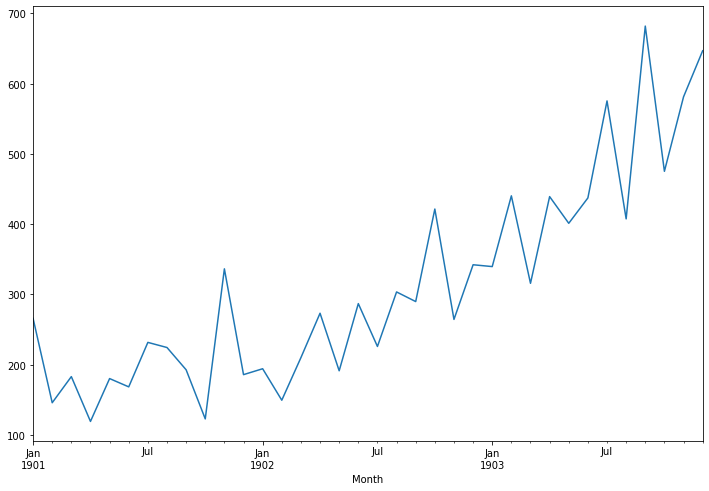

In [18]:
def parser(x):
	return dt.strptime('190'+x, '%Y-%m')

x = pd.read_csv("datasets/untitled.txt", header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
_ = df.plot()
x.describe()

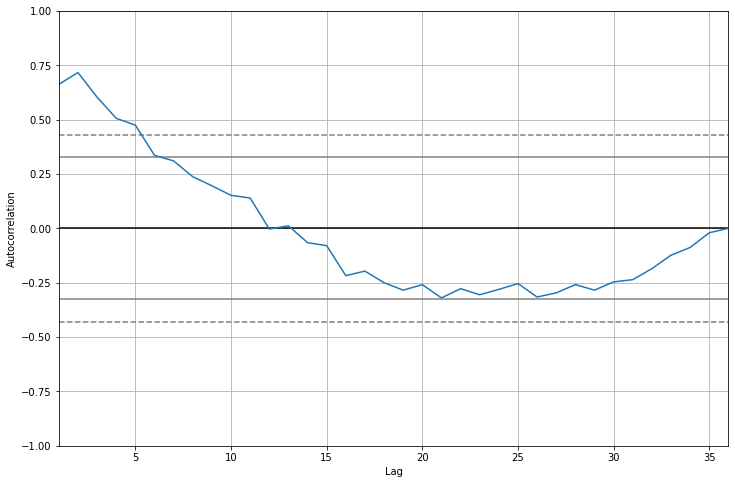

In [21]:
_ = autocorrelation_plot(x)

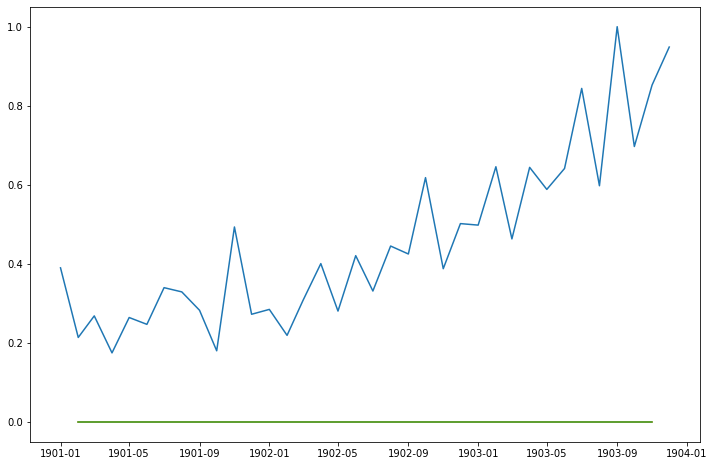

In [26]:
def lag(x, i):
    if i == 0:
        return x
    else:
        return lag(x[1:] - x[:-1], i-1)


plt.plot(x/x.max())
plt.plot(lag(x, 1))
plt.plot(lag(x, 2))
pass

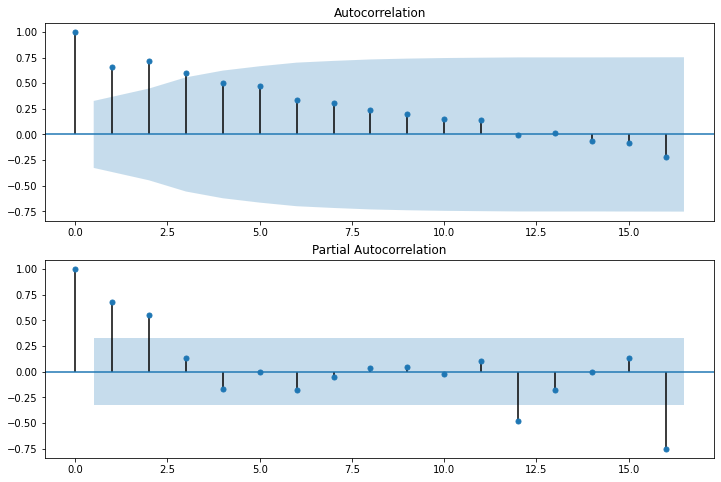

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(12,8))
plot_acf(x, ax=axes[0])
plot_pacf(x, ax=axes[1])
pass

/Users/edouard/.virtualenvs/stats/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/edouard/.virtualenvs/stats/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


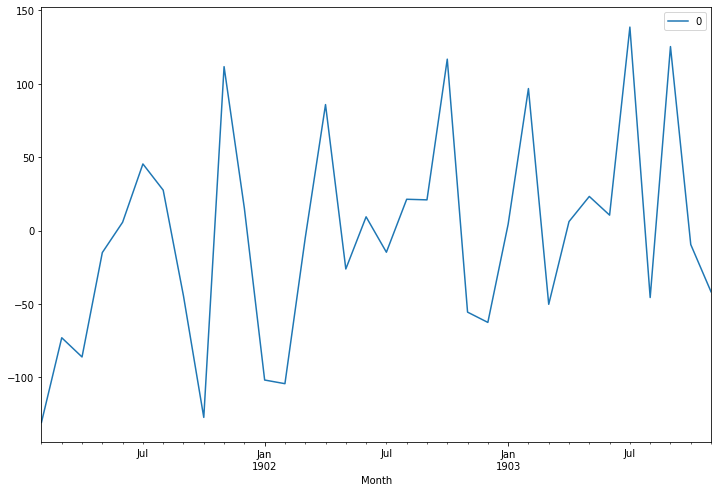

In [28]:
model = ARIMA(x[:-1], order=(2,1,0))
model_fit = model.fit()
model_fit.summary()
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

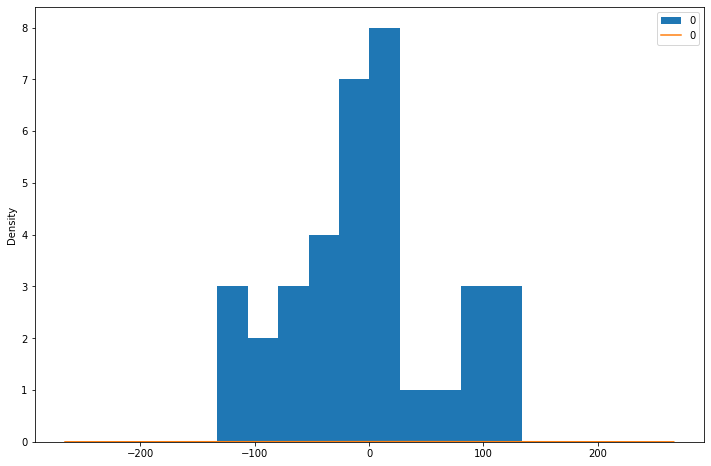

In [114]:
residuals.plot(kind="hist", ax=plt.gca())
residuals.plot(kind="kde", ax=plt.gca())